In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,3)

Read the Image

In [4]:
img = cv2.imread('./archive/train/Carlos_Sainz/10005.jpg')
img.shape

(933, 1400, 3)

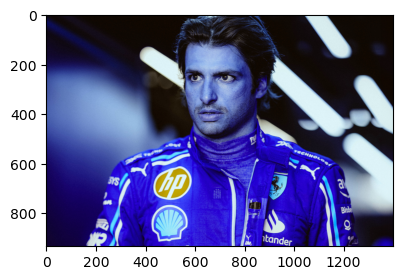

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(933, 1400)

In [7]:
gray

array([[15, 11, 11, ...,  7, 10, 28],
       [12, 11, 18, ..., 10,  8,  7],
       [13, 13, 12, ...,  7,  6,  3],
       ...,
       [16, 21, 18, ..., 46, 46, 47],
       [24, 22, 20, ..., 47, 47, 48],
       [21, 22, 23, ..., 46, 47, 58]], dtype=uint8)

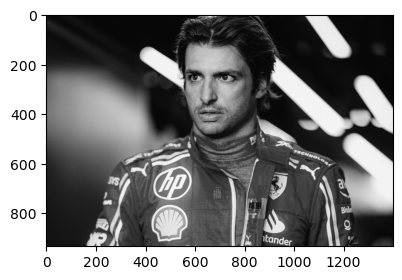

In [8]:
plt.imshow(gray, cmap='gray')

Find eyes and face with Haar Cascade

In [9]:
face = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face.detectMultiScale(gray, 1.3, 5)
faces

array([[514, 134, 304, 304]], dtype=int32)

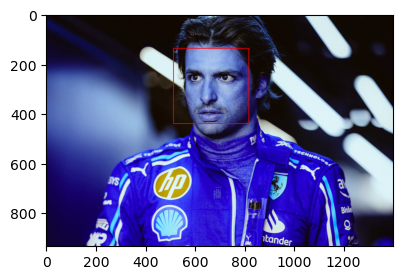

In [10]:
(x, y, w, h) = faces[0]
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

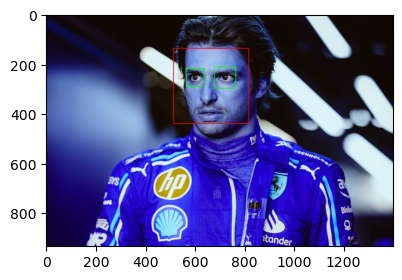

In [11]:
#from the opencv documentation:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

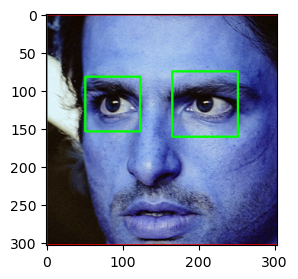

In [12]:
plt.imshow(roi_color, cmap='gray')

Crop the image to just the face if haar cascade finds 2 eyes:

In [13]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

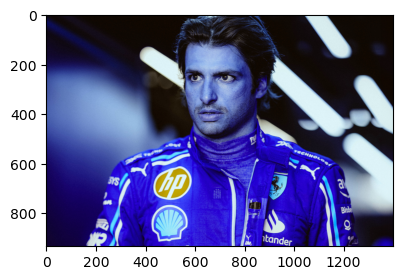

In [14]:
og_image = cv2.imread('./archive/train/Carlos_Sainz/10005.jpg')
plt.imshow(og_image)

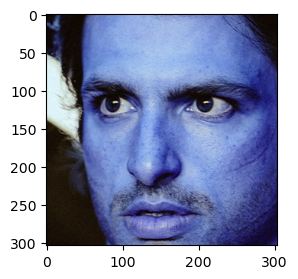

In [15]:
cropped_image = get_cropped_image('./archive/train/Carlos_Sainz/10005.jpg')
plt.imshow(cropped_image)

Move cropped images to a different folder

In [16]:
path_to_data = "./archive/train/"
path_to_cropped = "./archive/train/cropped/"

import os
#get current paths
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./archive/train/Lando_Norris',
 './archive/train/George_Russell',
 './archive/train/Lewis_Hamilton',
 './archive/train/Carlos_Sainz',
 './archive/train/Max_Verstappen']

In [17]:
import shutil
if os.path.exists(path_to_cropped):
    shutil.rmtree(path_to_cropped)
os.mkdir(path_to_cropped)

In [18]:
import filetype

cropped_image_dirs = []
driver_names_dict = {}

for img_dir in img_dirs:
    count = 1
    driver_name = img_dir.split('/')[-1]
    print(driver_name)
    driver_names_dict[driver_name] = []
    for entry in os.scandir(img_dir):
        if filetype.is_image(entry.path):
            print(entry.path)
            roi_color = get_cropped_image(entry.path)
        else:
            roi_color = None
        #check to find a face with 2 eyes:
        if roi_color is not None:
            cropped_folder = path_to_cropped + driver_name
            #make a folder for driver for first image:
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            #add cropped photo to new folder
            cropped_file_name = driver_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            #add file paths to a dictionary for future use:
            cv2.imwrite(cropped_file_path, roi_color)
            driver_names_dict[driver_name].append(cropped_file_path)
            count+=1
            
    

Lando_Norris
./archive/train/Lando_Norris/10043.jpg
Generating cropped images in folder:  ./archive/train/cropped/Lando_Norris
./archive/train/Lando_Norris/10042.jpg
./archive/train/Lando_Norris/10056.jpg
./archive/train/Lando_Norris/10040.jpg
./archive/train/Lando_Norris/10055.jpg
./archive/train/Lando_Norris/10041.jpg
./archive/train/Lando_Norris/10045.jpg
./archive/train/Lando_Norris/10051.jpg
./archive/train/Lando_Norris/10050.jpg
./archive/train/Lando_Norris/10044.jpg
./archive/train/Lando_Norris/10052.jpg
./archive/train/Lando_Norris/10046.jpg
./archive/train/Lando_Norris/10047.jpg
./archive/train/Lando_Norris/14.jpg
./archive/train/Lando_Norris/28.jpg
./archive/train/Lando_Norris/10020.jpg
./archive/train/Lando_Norris/10008.jpg
./archive/train/Lando_Norris/10009.jpg
./archive/train/Lando_Norris/10021.jpg
./archive/train/Lando_Norris/10035.jpg
./archive/train/Lando_Norris/29.jpg
./archive/train/Lando_Norris/15.jpg
./archive/train/Lando_Norris/01.jpg
./archive/train/Lando_Norris/1

Use Haar Wavelet Transformation to extract important features from image

In [19]:
import pywt

#img is the input image, mode is the default wavelet type, level is the level of decomposition
def w2d(img, mode='haar' , level=1):
    imArray = img
    # DATATYPE CONVERSIONS
        # convert from RGB to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
        # convert each pixel to 32-bit floating point
    imArray = np.float32(imArray)
        # normalize the pixel values by dividing by 255, scaling values to the range [0, 1]
    imArray/= 255;
        # compute 2D discrete wavelet transform [DWT] of image. 
            # cfs[0] is the approx coeffs (low-frequency components) in a 2D numpy array. cfs[1], cfs[2], 
            # & so on are tuples, each with 3 2D numpy arrays of detail coefficients (high-frequency components) 
            # in horizontal, vertical, and diagonal directions at each level of decomposition
    cfs = pywt.wavedec2(imArray, mode, level=level)
    
    # PROCESS COEFFICIENTS
        # converts cfs to a modifiable list
    cfs_h = list(cfs)
        # set approx coeffs to 0 to focus the reconstruction on details
    cfs_h[0] *= 0;
    
    # RECONSTRUCTION
        # reconstructs the image with the modified wavelet transformations
    imArray_h = pywt.waverec2(cfs_h, mode);
        # scales the reconstructed image back to [0, 255]
    imArray_h *= 255;
        # converts image back to standard 8-bit unsigned integer format
    imArray_h = np.uint8(imArray_h)
    
    return imArray_h

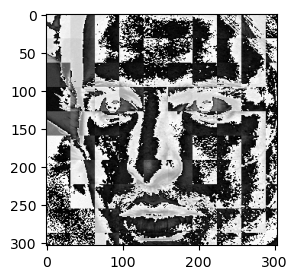

In [20]:
img_haar = w2d(cropped_image, 'db1', 5)
plt.imshow(img_haar, cmap='gray')

In [21]:
driver_names_dict

{'Lando_Norris': ['./archive/train/cropped/Lando_Norris/Lando_Norris1.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris2.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris3.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris4.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris5.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris6.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris7.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris8.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris9.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris10.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris11.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris12.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris13.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris14.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris15.jpg',
  './archive/train/cropped/Lando_Norris/Lando_Norris16.jpg',
  './archive/trai

In [22]:
class_dict = {}
count = 0
for driver_name in driver_names_dict.keys():
    class_dict[driver_name] = count
    count += 1
class_dict

{'Lando_Norris': 0,
 'George_Russell': 1,
 'Lewis_Hamilton': 2,
 'Carlos_Sainz': 3,
 'Max_Verstappen': 4}

Vertically stack the raw and wavelet transformed images for all images in cropped folder

In [23]:
X, y = [], []
for driver_name, training_files in driver_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_haar = w2d(img, 'db1', 5)
        scaled_img_haar = cv2.resize(img_haar, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_haar.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[driver_name])

In [24]:
# raw image + wt image = 32*32*3 + 32*32 = 4096
len(X[0]) 

4096

In [25]:
#convert to float to avoid errors later on
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(217, 4096)

Train the Model

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

params_dict = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability = True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

scores = []
best_estimators = {}
for algo, mp in params_dict.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.612121,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.432765,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.556629,{'logisticregression__C': 1}


In [31]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [34]:
best_estimators['svm'].score(X_test, y_test)

0.6727272727272727

In [35]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7272727272727273

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimators['logistic_regression'].predict(X_test))
cm

array([[ 7,  0,  1,  2,  2],
       [ 1, 14,  0,  2,  1],
       [ 0,  0,  9,  0,  0],
       [ 1,  0,  2,  7,  0],
       [ 2,  1,  0,  0,  3]])

Text(70.72222222222221, 0.5, 'Truth')

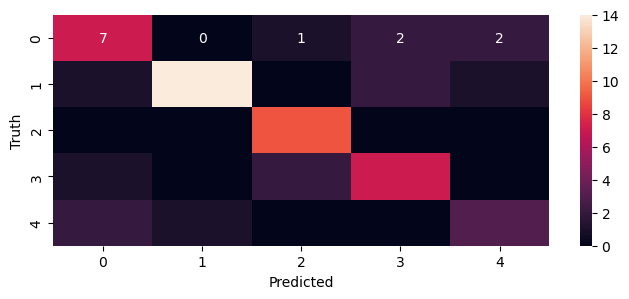

In [38]:
import seaborn as sn 
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Save the Trained Model and Class Dictionary

In [39]:
import joblib
joblib.dump(best_estimators['logistic_regression'], 'saved_model.pkl')

['saved_model.pkl']

In [40]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))